In [1]:
from utils import *
import seaborn as sns

sns.set(rc={"figure.figsize": (20, 10)})

In [2]:
nlp = spacy.load("en_core_web_md")

# 1. Amostrando dados para análise

In [3]:
positives_df = pd.read_csv("../data/extreme_positive.csv").drop_duplicates("review_id")
negatives_df = pd.read_csv("../data/extreme_negative.csv").drop_duplicates("review_id")

In [4]:
positives_df["review_body"] = apply_text_processing_pipeline(positives_df["review_body"])
negatives_df["review_body"] = apply_text_processing_pipeline(negatives_df["review_body"])

In [5]:
raw_text_p = "\n".join(positives_df["review_body"].sample(frac=.5).to_list())
raw_text_n = "\n".join(negatives_df["review_body"].to_list())

# 2. Buscando quais palavras tem maior similaridade com "refrigerator" 

Word Embeddings! (GloVe imbutido no pacote "en_core_web_md") Avaliamos a similaridade através de distância de cossenos. O objetivo é encontrar sinônimos para o produto.

In [6]:
all_text = nlp(raw_text_p + raw_text_n)

In [7]:
threshold = 0.80
reference = nlp("refrigerator")

In [8]:
similar = set()
for tok in all_text:
    # s
    if tok.similarity(reference) > threshold:
        similar.add(tok.text)

In [9]:
similar

{'FREEZER',
 'FRIDGE',
 'FRIG',
 'Freezer',
 'Freezers',
 'Fridge',
 'Fridges',
 'Frig',
 'ICEMAKER',
 'Icemaker',
 'REFRIGERATOR',
 'REFRIGERATORS',
 'Refigerator',
 'Refridgerator',
 'Refrigerator',
 'Refrigerators',
 'crispers',
 'defrost',
 'defrosting',
 'freezer',
 'freezers',
 'fridge',
 'fridges',
 'frig',
 'frige',
 'icebox',
 'icemaker',
 'refridgerator',
 'refrig',
 'refrigerated',
 'refrigerator',
 'refrigerators'}

# 3. Extraindo relações de interesse

## 3.1 Transformando o texto em um documento do spaCy

In [10]:
pos_doc = nlp(raw_text_p)
neg_doc = nlp(raw_text_n)

## 3.2 Buscando por afirmações a respeito de um conjunto pre-definido de sujeitos

TODO: explicar a função do textacy

In [11]:
possible_subjects = ['it', 'refrigerator', 'fridge', 'freezer']

In [12]:
pos_infos = get_statements(pos_doc, possible_subjects)
neg_infos = get_statements(neg_doc, possible_subjects)

## 3.3 Amostrando resultados

In [13]:
from random import shuffle

In [14]:
shuffle(pos_infos), shuffle(neg_infos)

(None, None)

In [15]:
pos_infos[:20]

[(It, is, sleek on the outside and looks so nice in our kitchen),
 (It, been, a great addition to our kitchen!),
 (it, was, worth it. ),
 (It,
  is,
  the perfect size to accommodate refreshments for clubs and for special events for 50 people),
 (fridge, is, perfect for us),
 (it, was, the best value and larger than any of the other brands),
 (it, is, much roomier than my old 18 cf refrigerator),
 (It, is, easy to clean),
 (freezer, is, perfect since we don't use as much as the rest of the fridge. ),
 (it, has been, very nice),
 (it, is, ice cold, not frozen),
 (fridge, was, WORTH every dime/Penny/Nickel and Dollar bill),
 (it, 's, so big plenty of space),
 (It, 's, weak, bluish, and makes food look unappetizing),
 (freezer,
  is,
  great for storing additional food and seems to keep everything at a good cold temperature),
 (it, was, a perfect fit.),
 (it,
  's,
  important that our fridge can be split into 3 mostly-even amounts of space),
 (It,
  is,
  spacious in both compartments an

In [16]:
neg_infos[:20]

[(it, being, a Christmas gift),
 (it, 's, a cosmetic thing and isn't covered by warranty),
 (it, 's, fine, but if it needs to be flush add at least two inches),
 (It,
  is,
  really hard to do without a major appliance, especially one that keeps all your food from spoiling),
 (it, 's, an issue with the compressor),
 (it, is, the way how it is built),
 (fridge,
  is,
  technically the largest appliance in our kitchen and visible both dining and living room),
 (It, is, unreliable and LG does not stand behind their products),
 (it, was, a common complaint),
 (it, is, terribly noisy),
 (Freezer,
  is,
  great, but fridge can't get below 45deg, and there is a lot of condensation - puddling all over),
 (it, is, 1/11/20 and my freezer portion is not freezing),
 (It,
  been,
  3 months and we are still waiting a new door to be delivered to replace our BRAND NEW door),
 (it, is, extremely loud when compressor went on),
 (it,
  might be,
  good idea to replace water line connecting water supply 

# 4 Criando WordClouds com as afirmações a respeitos dos sujeitos

## 4.1 Carregando palavras frequentes a ignorar

In [17]:
import json
with open("../data/ignore_words.json", "r") as f:
    ignore = json.load(f)

## 4.1 Reviews positivas

In [18]:
statements = [info[2].text for info in pos_infos]
statements[-20:]

['exactly what I wanted',
 'a little bigger and have solid shelves',
 'way too late',
 'a little awkward with the shelf layout from our previous fridge',
 'very intuitive to use',
 'amazingly quiet and well lit with plenty of space.\n',
 'exactly what I wanted',
 '2 cubic feet larger than my previous Kenmore refrigerator, but fit exactly in the same space',
 'brand new',
 'nice and cold, and the freezer is great too',
 'beautiful in the kitchen, works really well, and so roomy in the fridge and in the freezer',
 'my first french style and I absolutely love it!!\n',
 'a life saver. \n',
 'a great product and came to the house right on time',
 'ABSOLUTLY QUIET IN MY BEDROOM',
 'part of the 4 appliance package we bought in February 2019',
 'very nice, good amount of room',
 'a beautiful refrigerator and looks great in my remodeled kitchen',
 'the first one we have had with the cooler on top',
 'a challenge to take it out now']

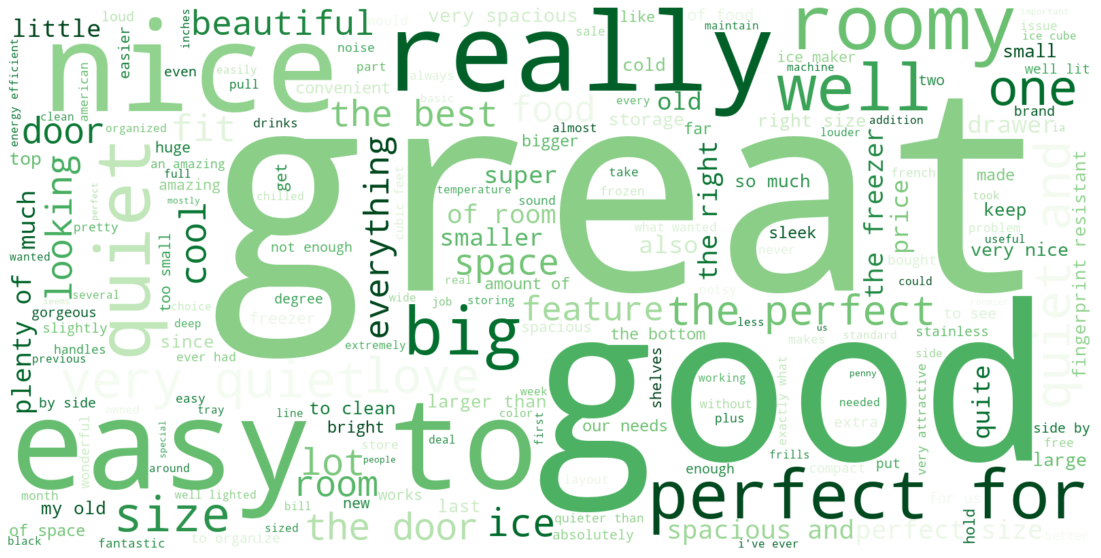

In [19]:
build_wordcloud("\n".join(statements), ignore, color_map="Greens")

## 4.2 Reviews negativas

In [20]:
statements = [info[2].text for info in neg_infos]
statements[-20:]

['at 70 degrees and it spoiled $300 worth of food!\n',
 'so difficult',
 'less than two months old when we came home from a two week vacation to find it had stopped cooling',
 'the same way but started cooling',
 'almost 3 months that it dose not working properly',
 'not cold',
 'really hard to do without a major appliance, especially one that keeps all your food from spoiling',
 'the same size and in the exact same spot',
 'on the basement, afterall',
 '40 degrees inside Ice maker is worthless stops making ice long before bin is full\nWhatever you do',
 'warmer inside than in the kitchen',
 'the compressor and it would cost $800 to replace',
 'at -6 deg',
 'as loud as my 25 year old frig that was still working',
 'a code that required a service visit',
 'loud and the noises sound like it is haunted',
 'a good thing I still have my old refrigerator that I purchased over 20 years ago that works like a charm',
 's LEMON, ice maker repeatedly breaks',
 'at least another week before we wou

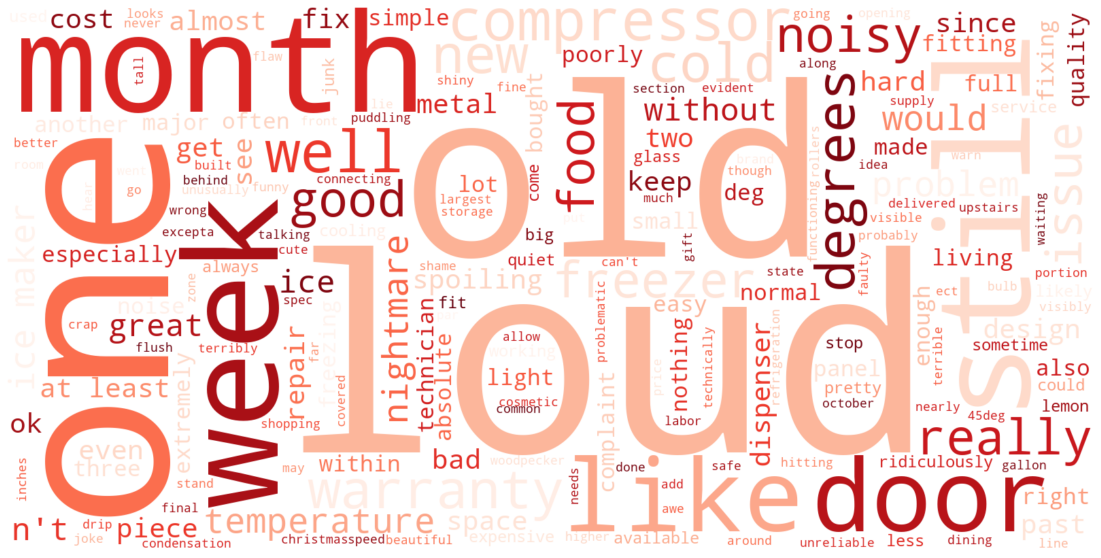

In [21]:
build_wordcloud("\n".join(statements), ignore, color_map="Reds")